In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
import sys
sys.path.append("ProcessModelResults/")
from my_functions import *
catchment_name = 'LinDyke'

In [22]:
model_directory = '../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, 'Observed')

In [23]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [24]:
sys.path.append("../")
from my_functions import *

if catchment_name == 'LinDyke':
    catchment_name_str = "Resampled.Terrain" 
    catchment_shpfilename = 'CatchmentLinDyke_exported'
    minx, miny, maxx, maxy  = 437000,  426500,  445500, 434300
    catchment_gdf = gpd.read_file(model_directory + 'CatchmentLinDyke_exported.shp')
    
elif catchment_name == 'WykeBeck':
    catchment_name_str = "Terrain.wykeDEM" 
    catchment_shpfilename = 'WykeBeckCatchment'
    minx, miny, maxx, maxy = 430004,  429978, 438660, 440996
    catchment_gdf = gpd.read_file(model_directory + 'WykeBeckCatchment.shp')
    
# Create a bounding box (this is used in preparing the rasters)
bbox = box(minx, miny, maxx, maxy)

In [25]:
n_flooded_cells_dict_2mins = {}
volumes_dict_2mins = {}
for method in ['6h_sp_bl_0.6', '6h_sp_bl_0.9']:
    print(method)
    n_flooded_cells_2mins = []
    volumes_2mins = []
    dates = []
    Hs=range(12,24)
    Ms= range(1,61,2)
    for H in Hs:
        for M in Ms:
            M = str(M).zfill(2)
            dates.append('{} {}'.format(H,M))
            fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
            try:
                depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
                number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                n_flooded_cells_2mins.append(number_flooded_cells)
                volumes_2mins.append(flooded_volume)
            except:
                print(fp)
    # Add to dict
    n_flooded_cells_dict_2mins[method] = n_flooded_cells_2mins
    volumes_dict_2mins[method] = volumes_2mins

6h_sp_bl_0.6
6h_sp_bl_0.9


In [47]:
test_dict_5mins = {}
test_dict_volumes_5mins = {}
for method in methods_dict['Idealised']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(0,24)
    M = 0
    for day in [2,3]:
        for H in Hs:
                M = str(M).zfill(2)
                H = str(H).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, day, H, M)
                try:
                    depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
                    number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                    flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                    n_flooded_cells_5mins.append(number_flooded_cells)
                    volumes_5mins.append(flooded_volume)
                except:
                    print(fp)
        # Add to dict
        test_dict_5mins[method] = n_flooded_cells_5mins
        test_dict_volumes_5mins[method] = volumes_5mins

6h_sp_fl_0.1
6h_sp_fl_0.2
6h_sp_fl_0.3
6h_sp_fl_0.4
6h_sp_c_0.5
6h_sp_bl_0.6
6h_sp_bl_0.7
6h_sp_bl_0.8
6h_sp_bl_0.9


In [111]:
n_flooded_cells_dict_5mins = {}
volumes_dict_5mins = {}
for method in ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4', '6h_sp_c_0.5', '6h_sp_bl_0.7','6h_sp_bl_0.8']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(12,24)
    Ms= range(0,60,5)
    for H in Hs:
        for M in Ms:
            if H == 12 and M == 0:
                pass
            else:
                M = str(M).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
                try:
                    depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
                    number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                    flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                    n_flooded_cells_5mins.append(number_flooded_cells)
                    volumes_5mins.append(flooded_volume)            
                except:
                    print(fp)
    # Add to dict
    n_flooded_cells_dict_5mins[method] = n_flooded_cells_5mins
    volumes_dict_5mins[method] = volumes_5mins

6h_sp_fl_0.1


### Create dataframe

In [126]:
df_2mins = pd.DataFrame(n_flooded_cells_dict_2mins)
df_5mins = pd.DataFrame(n_flooded_cells_dict_5mins)
df_test = pd.DataFrame(test_dict_5mins)

### Convert from number of cells to area

In [130]:
df_2mins = df_2mins/1000000
df_5mins = df_5mins/1000000
df_test = df_test/1000000

### Add minutes column

In [128]:
df_2mins['minute']= list(range(1,len(df_2mins)*2,2))
df_5mins['minute']= list(range(0,len(df_5mins)*5,5))
df_test['minute']= list(range(720,(len(df_test)*60)+720,60))

### Save to csv

In [ ]:
# df_2mins.to_csv("df_2mins.csv",index=False)
# df_5mins.to_csv("df_5mins.csv",index=False)
# df_test.to_csv("df_test.csv",index=False)

### OR read in from csv

In [121]:
df_2mins  =pd.read_csv("df_2mins.csv")
df_5mins  =pd.read_csv("df_5mins.csv")
df_test  =pd.read_csv("df_test.csv")

### Plot

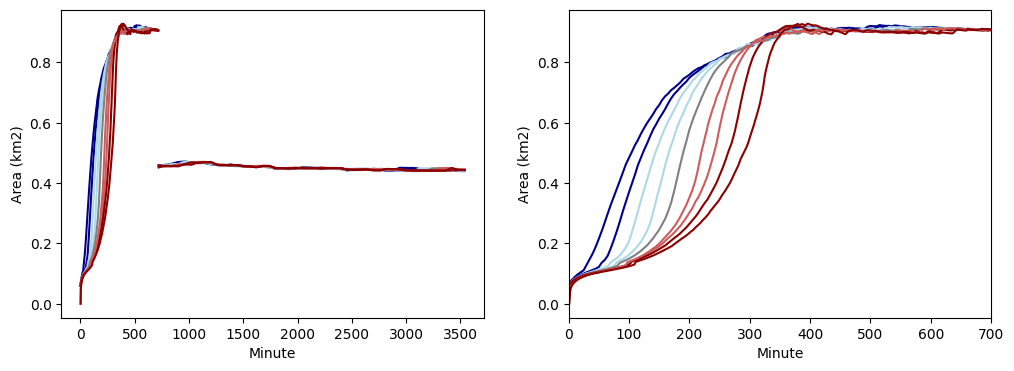

In [129]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins.columns[:-1]):
      ax[0].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins.columns[:-1]):
      ax[0].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test.columns[:-1]):
      ax[0].plot(df_test["minute"], df_test[column], color = colors_test[number]);    
        
for number, column in enumerate(df_5mins.columns[:-1]):
      ax[1].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins.columns[:-1]):
      ax[1].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test.columns[:-1]):
      ax[1].plot(df_test["minute"], df_test[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")